In [ ]:
pip install tensorflow

In [ ]:
pip install numpy

In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [11]:
# Step 1: Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os


In [12]:
# Dataset paths
train_dir = r"C:\Users\Gunji Madhav\OneDrive\Desktop\gitdemo\cat_and_dog_Classification_DL\test"
val_dir   = r"C:\Users\Gunji Madhav\OneDrive\Desktop\gitdemo\cat_and_dog_Classification_DL\train"

# Image size and batch size
IMG_SIZE = (180, 180)
BATCH_SIZE = 32

# Load train and validation datasets
train_ds = keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary"
)

val_ds = keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary"
)

# Improve performance (prefetching)
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds   = val_ds.prefetch(buffer_size=AUTOTUNE)


Found 5000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [13]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


In [14]:
# Create empty sequential model
model = keras.Sequential()

# 1️⃣ Data Augmentation
model.add(data_augmentation)

# 2️⃣ Normalization (rescale pixel values to 0–1)
model.add(layers.Rescaling(1./255, input_shape=(180,180,3)))

# 3️⃣ Convolution + Pooling layers
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D())

# 4️⃣ Dropout for regularization
model.add(layers.Dropout(0.3))

# 5️⃣ Flatten + Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))   # Binary output

# Show model summary
model.summary()


c:\Users\Gunji Madhav\anaconda3\envs\madhav\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [16]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15
)


Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.5184 - loss: 0.7050 - val_accuracy: 0.5253 - val_loss: 0.6877
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 147s 940ms/step - accuracy: 0.5724 - loss: 0.6729 - val_accuracy: 0.6389 - val_loss: 0.6489
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.6212 - loss: 0.6522 - val_accuracy: 0.6658 - val_loss: 0.6140
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.6694 - loss: 0.6088 - val_accuracy: 0.6939 - val_loss: 0.5822
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.7122 - loss: 0.5650 - val_accuracy: 0.7313 - val_loss: 0.5365
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 774s 5s/step - accuracy: 0.7286 - loss: 0.5450 - val_accuracy: 0.7321 - val_loss: 0.5363
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.7478 - loss: 0.5173 - val_accuracy: 0.7318 - val_loss: 0.5289
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 131s 835ms/step - accuracy: 0.7490 - loss: 0.5037 - va

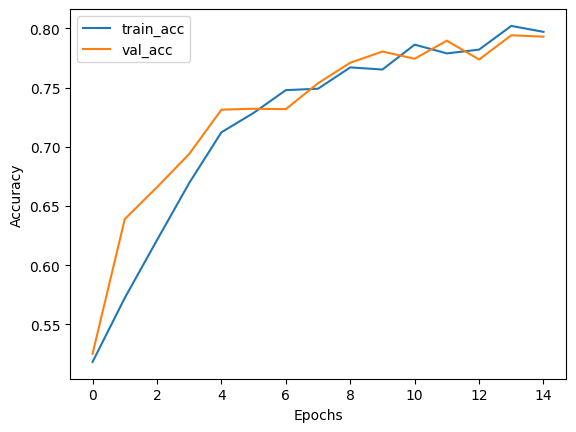

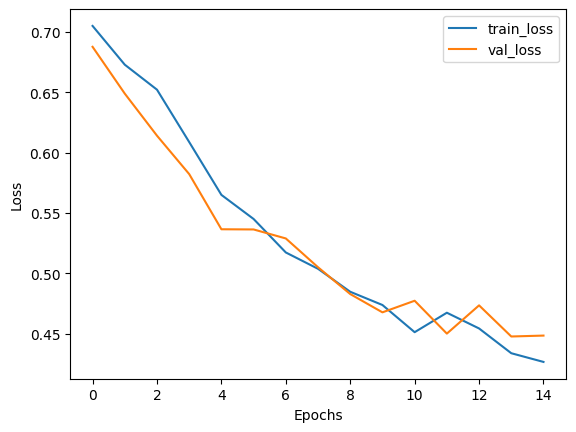

In [17]:
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
